### Подключаем все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Считаем данные и посмотрим как они выглядят

In [2]:
data = pd.read_csv('_data_.csv')

data.head(20)

,data,group
0,1204.200410,control
1,891.194479,control
2,1475.181168,control
3,1220.248308,control
4,1101.598051,control
5,1653.104734,control
6,1045.518998,control
7,1245.426673,control
8,683.326708,control
9,1344.404223,control


In [3]:
data['group'].unique()

array(['control', 'test'], dtype=object)

In [4]:
def bootstrap(data):
    dict_ = []
    for _ in range(1000):
        control = np.random.choice(data[data['group'] == 'control']['data'].values, size=100_000, replace=True)
        test = np.random.choice(data[data['group'] == 'test']['data'].values, size=100_000, replace=True)
        dict_.append(test.mean() - control.mean())
    return dict_

### Посмотрим на полученные значения

In [6]:
res = bootstrap(data)

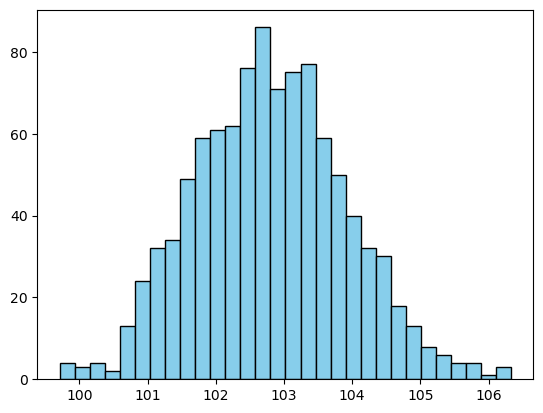

In [7]:
plt.hist(res, bins=30, color='skyblue', edgecolor='black')
plt.show()

### Отобразим вертикальными линиями 2.5 и 97.5 процентили, чтобы посмотреть на доверительный интервал значимости 0.05

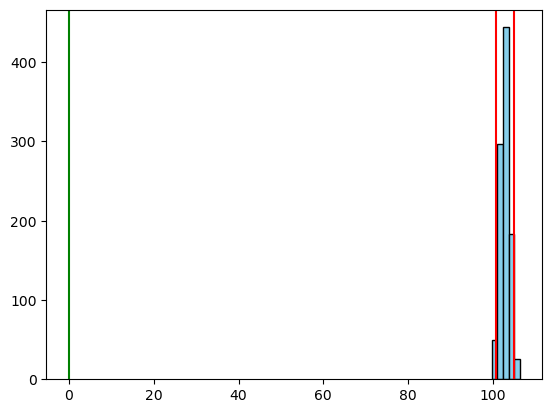

In [8]:
plt.hist(res, bins=5, color='skyblue', edgecolor='black')
plt.axvline(np.percentile(res, 2.5), color='red')
plt.axvline(np.percentile(res, 97.5), color='red')
plt.axvline(0, color='green')
plt.show()

### Как мы видим, 0 не попал в доверительный интервал, а значит гипотеза неверна, и мы ее отвергаем.